In [6]:
# import kagglehub
import shutil
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:


# Download the dataset (it goes to kagglehub's default directory)
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

# Get current working directory
current_directory = os.getcwd()

# Move dataset to current directory
destination_path = os.path.join(current_directory, os.path.basename(path))
shutil.move(path, destination_path)

print("Dataset moved to:", destination_path)


NameError: name 'kagglehub' is not defined

Reading the data

In [36]:
df = pd.read_csv('1/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Checking the data type of each column

In [37]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Checking for missing values

In [38]:
print(df.isnull().sum())
# no missing values found

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Printing some statistics

In [39]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Doing some EDA

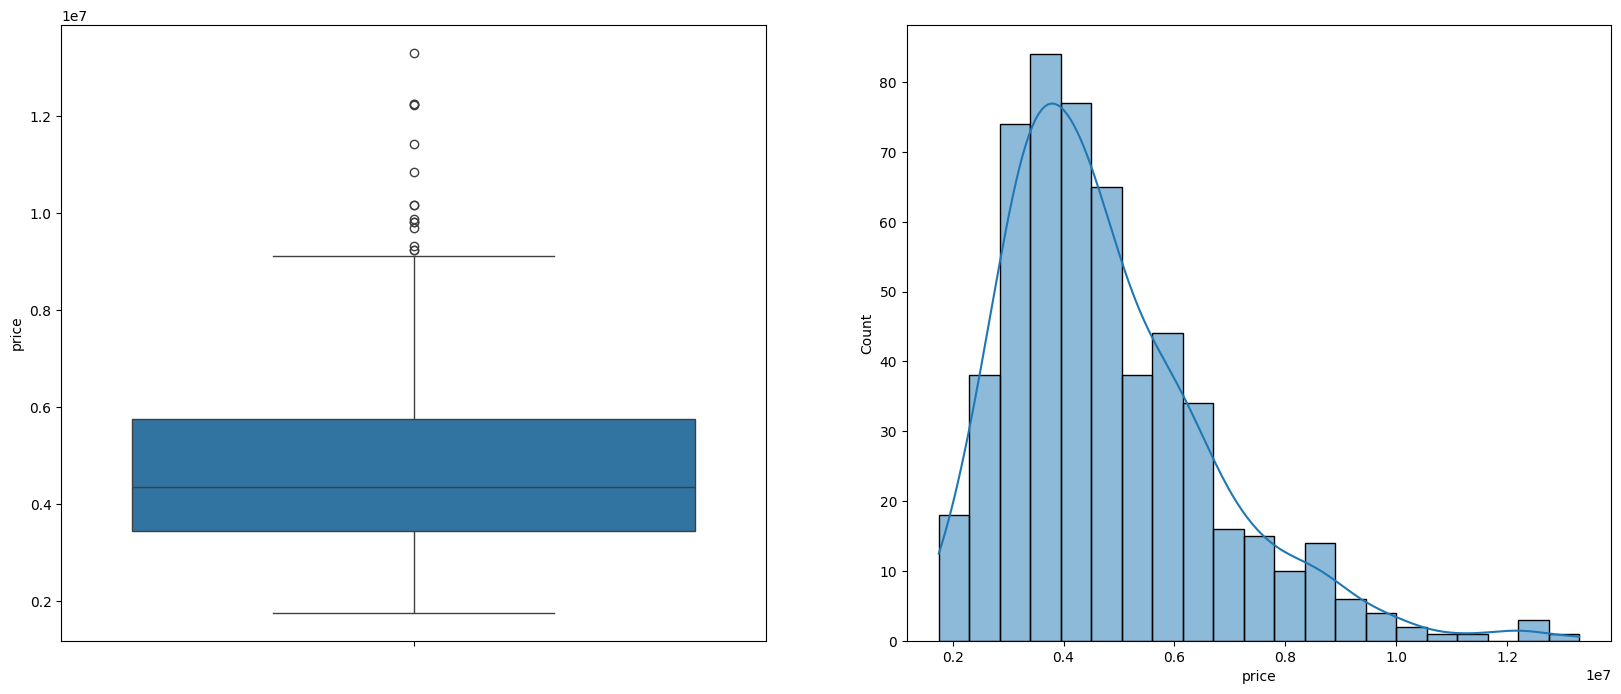

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)

# Box plot for a Price column
sns.boxplot(df.price)

plt.subplot(1, 2, 2)
sns.histplot(df.price, kde=True)

plt.show()

Analyzing and removing outliers from the price column

Outliers:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   
5  10850000  7500         3          3        1      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus   z_score  
0              no             yes        2      yes        furnished  4.566365  
1              no             yes        3       no        furnished  4.004484  
2              no              no        2      yes   semi-furnished  4.004484  
3              no             yes        3      yes        furnished  3.985755  
4              no             y

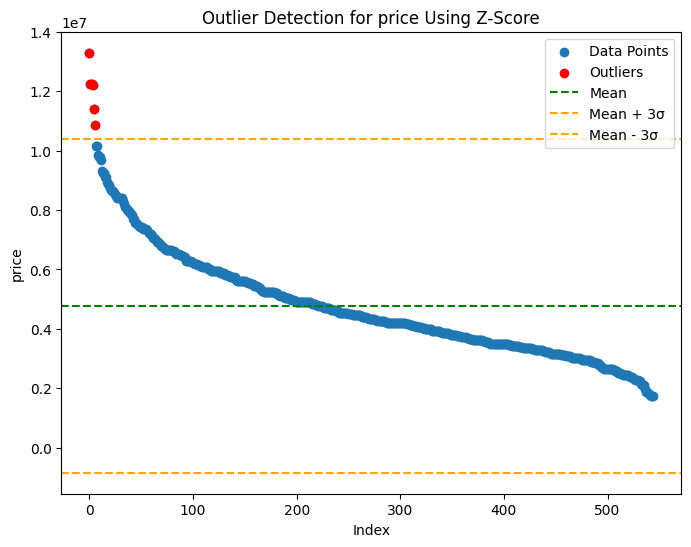

In [42]:
from scipy.stats import zscore

import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt


df['z_score'] = zscore(df['price'])

# Identify outliers
outliers = df[abs(df['z_score']) > 3]
print("Outliers:")
print(outliers)
print("total outliers are: ", len(outliers))

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['price'], label='Data Points')
plt.scatter(outliers.index, outliers['price'], color='red', label='Outliers')
plt.axhline(y=df['price'].mean(), color='green', linestyle='--', label='Mean')
plt.axhline(y=df['price'].mean() + 3 * df['price'].std(), color='orange', linestyle='--', label='Mean + 3σ')
plt.axhline(y=df['price'].mean() - 3 * df['price'].std(), color='orange', linestyle='--', label='Mean - 3σ')
plt.xlabel('Index')
plt.ylabel('price')
plt.legend()
plt.title('Outlier Detection for price Using Z-Score')
plt.show()

Analyzing and removing outliers from the area column

Outliers:
        price   area  bedrooms  bathrooms  stories mainroad guestroom  \
7    10150000  16200         5          3        2      yes        no   
10    9800000  13200         3          1        2      yes        no   
66    6930000  13200         2          1        1      yes        no   
69    6790000  12090         4          2        2      yes        no   
125   5943000  15600         3          1        1      yes        no   
211   4900000  12900         3          1        1      yes        no   
403   3500000  12944         3          1        1      yes        no   

    basement hotwaterheating airconditioning  parking prefarea  \
7         no              no              no        0       no   
10       yes              no             yes        2      yes   
66       yes             yes              no        1       no   
69        no              no              no        2      yes   
125       no              no             yes        2       no   
211      

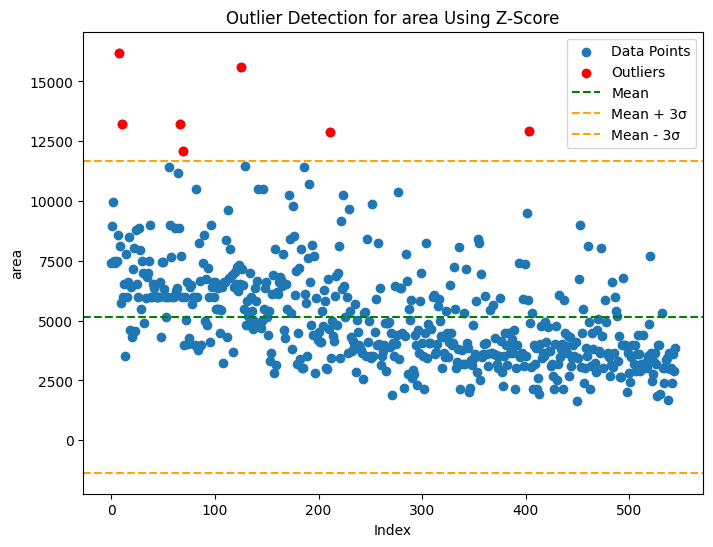

In [43]:
from scipy.stats import zscore

import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt


df['z_score'] = zscore(df['area'])

# Identify outliers
outliers = df[abs(df['z_score']) > 3]
print("Outliers:")
print(outliers)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['area'], label='Data Points')
plt.scatter(outliers.index, outliers['area'], color='red', label='Outliers')
plt.axhline(y=df['area'].mean(), color='green', linestyle='--', label='Mean')
plt.axhline(y=df['area'].mean() + 3 * df['area'].std(), color='orange', linestyle='--', label='Mean + 3σ')
plt.axhline(y=df['area'].mean() - 3 * df['area'].std(), color='orange', linestyle='--', label='Mean - 3σ')
plt.xlabel('Index')
plt.ylabel('area')
plt.legend()
plt.title('Outlier Detection for area Using Z-Score')
plt.show()

Analyzing the other numerical columns

In [44]:
print("Numerical columns:\n", df.select_dtypes(include=np.number).columns.tolist())

Numerical columns:
 ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'z_score']


Bedroom analysis

<Axes: ylabel='parking'>

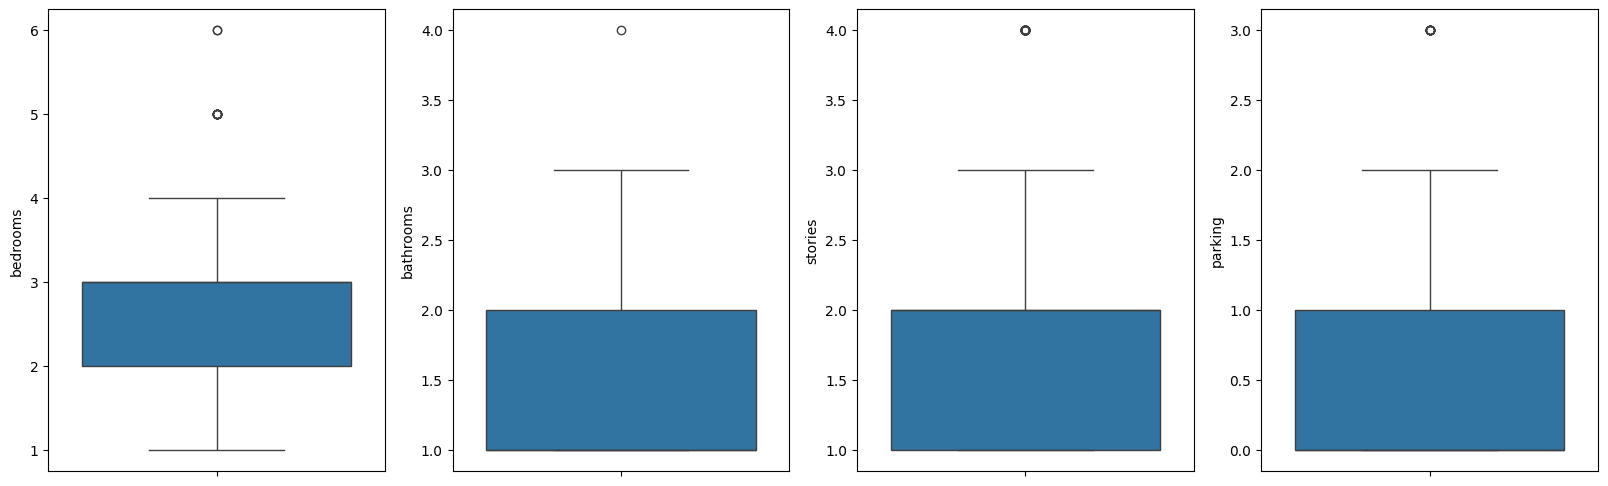

In [45]:
figure, axes = plt.subplots(1, 4, figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.boxplot(df.bedrooms)

plt.subplot(1, 4, 2)
sns.boxplot(df.bathrooms)

plt.subplot(1, 4, 3)
sns.boxplot(df.stories)

plt.subplot(1, 4, 4)
sns.boxplot(df.parking)

Plotting scatter plots

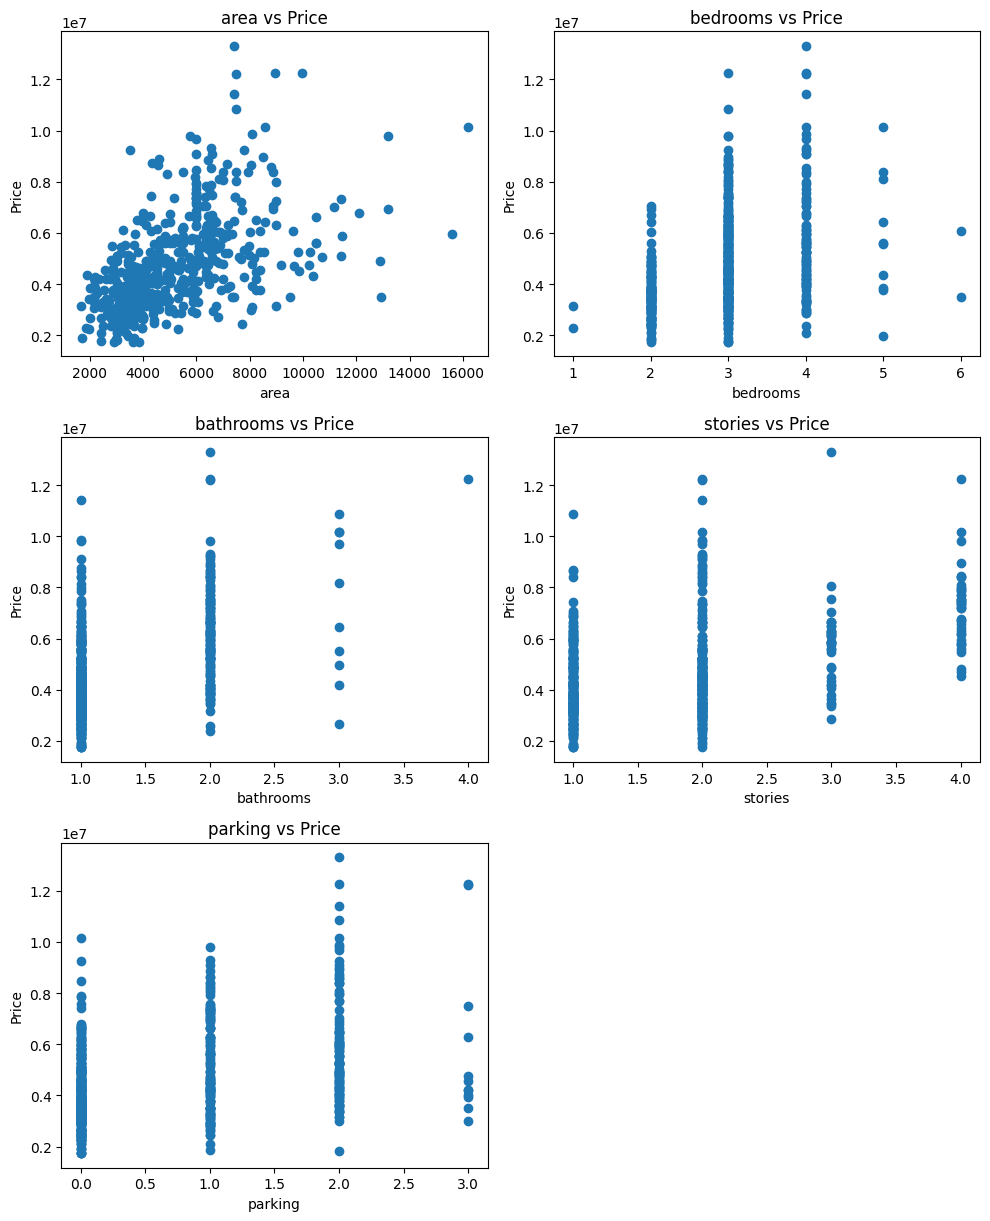

In [46]:


def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('area', 1)
scatter('bedrooms', 2)
scatter('bathrooms', 3)
scatter('stories', 4)
scatter('parking',5)

plt.tight_layout()

Area seems to have a positive correlation with price

Plotting a correlation matrix

<Axes: >

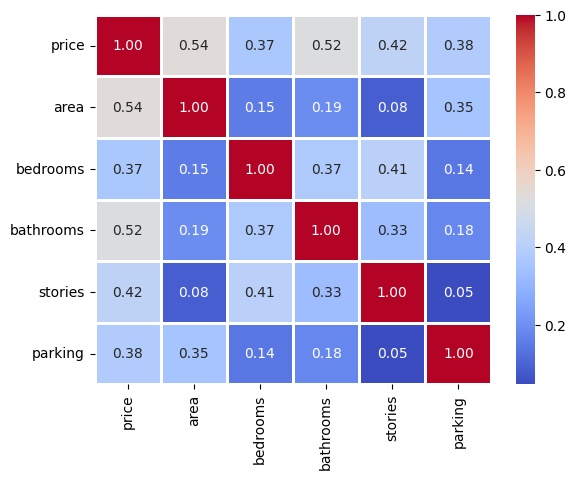

In [47]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.drop("z_score", axis=1, inplace=True)
simple_corr = numeric_df.corr()
sns.heatmap(simple_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

The above correlation matrix shows only the linear correlation between variables, which means that it might miss non linear relations
. So, I will use Spearman Rank correlation, which measures monotonic relationships (whether one variable increases as another increases, regardless of linearity).

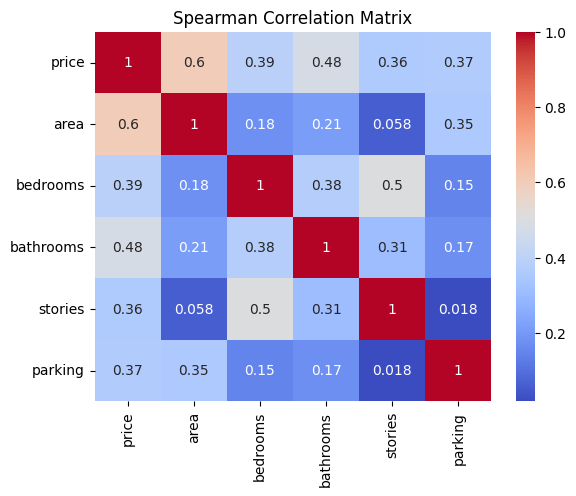

In [48]:
spearman_corr = numeric_df.corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

In [49]:
spearman_corr - simple_corr

,price,area,bedrooms,bathrooms,stories,parking
price,0.000000,0.066862,0.023960,-0.037634,-0.057856,-0.019022
area,0.066862,0.000000,0.024339,0.019973,-0.026228,0.000279
bedrooms,0.023960,0.024339,0.000000,0.003218,0.095727,0.007510
bathrooms,-0.037634,0.019973,0.003218,0.000000,-0.017396,-0.003514
stories,-0.057856,-0.026228,0.095727,-0.017396,0.000000,-0.027158
parking,-0.019022,0.000279,0.007510,-0.003514,-0.027158,0.000000


Since there is little to no difference between the 2 matrices, it suggests that the relationships between the variables are mostly linear

Visualizing categorical variables

In [50]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

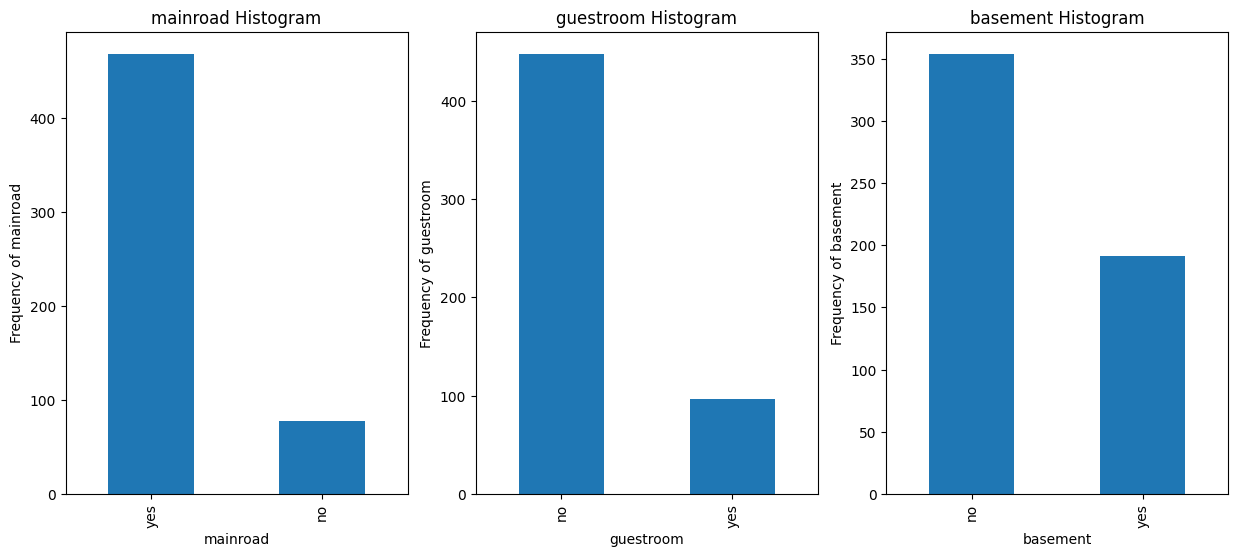

In [51]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = df['mainroad'].value_counts().plot(kind='bar')
plt.title('mainroad Histogram')
plt1.set(xlabel = 'mainroad', ylabel='Frequency of mainroad')

plt.subplot(1,3,2)
plt1 = df['guestroom'].value_counts().plot(kind='bar')
plt.title('guestroom Histogram')
plt1.set(xlabel = 'guestroom', ylabel='Frequency of guestroom')

plt.subplot(1,3,3)
plt1 = df['basement'].value_counts().plot(kind='bar')
plt.title('basement Histogram')
plt1.set(xlabel = 'basement', ylabel='Frequency of basement')

plt.show()

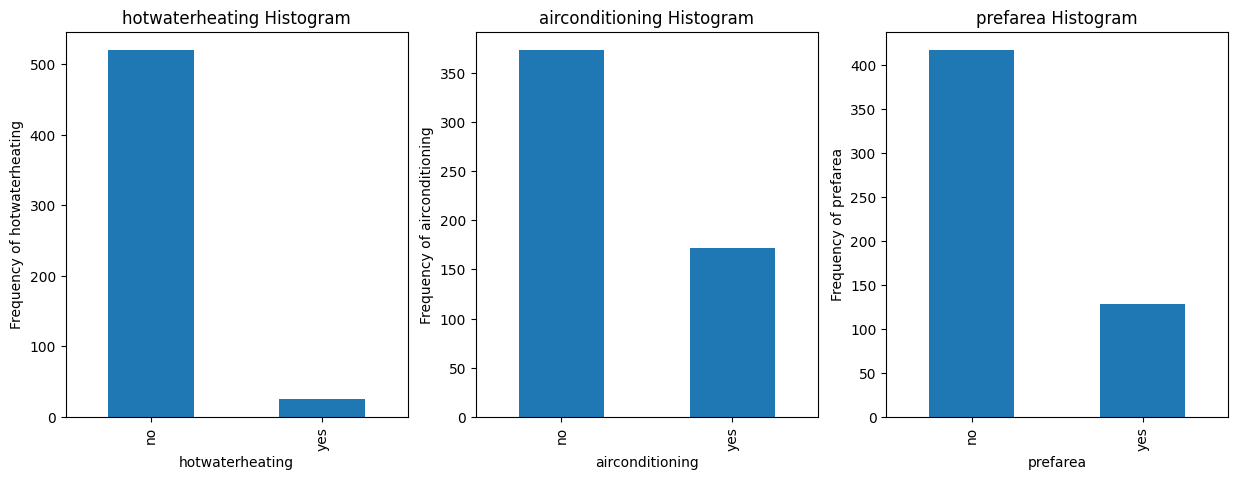

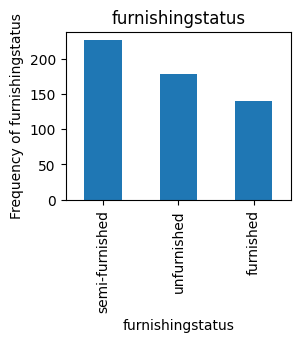

In [52]:


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt1 = df['hotwaterheating'].value_counts().plot(kind='bar')
plt.title('hotwaterheating Histogram')
plt1.set(xlabel = 'hotwaterheating', ylabel='Frequency of hotwaterheating')

plt.subplot(1, 3, 2)
plt1 = df['airconditioning'].value_counts().plot(kind='bar')
plt.title('airconditioning Histogram')
plt1.set(xlabel = 'airconditioning', ylabel='Frequency of airconditioning')

plt.subplot(1, 3, 3)
plt1 = df['prefarea'].value_counts().plot(kind='bar')
plt.title('prefarea Histogram')
plt1.set(xlabel = 'prefarea', ylabel='Frequency of prefarea')
plt.show()

plt.subplot(2, 2, 3)
plt1 = df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('furnishingstatus')
plt1.set(xlabel = 'furnishingstatus', ylabel='Frequency of furnishingstatus')
plt.show()



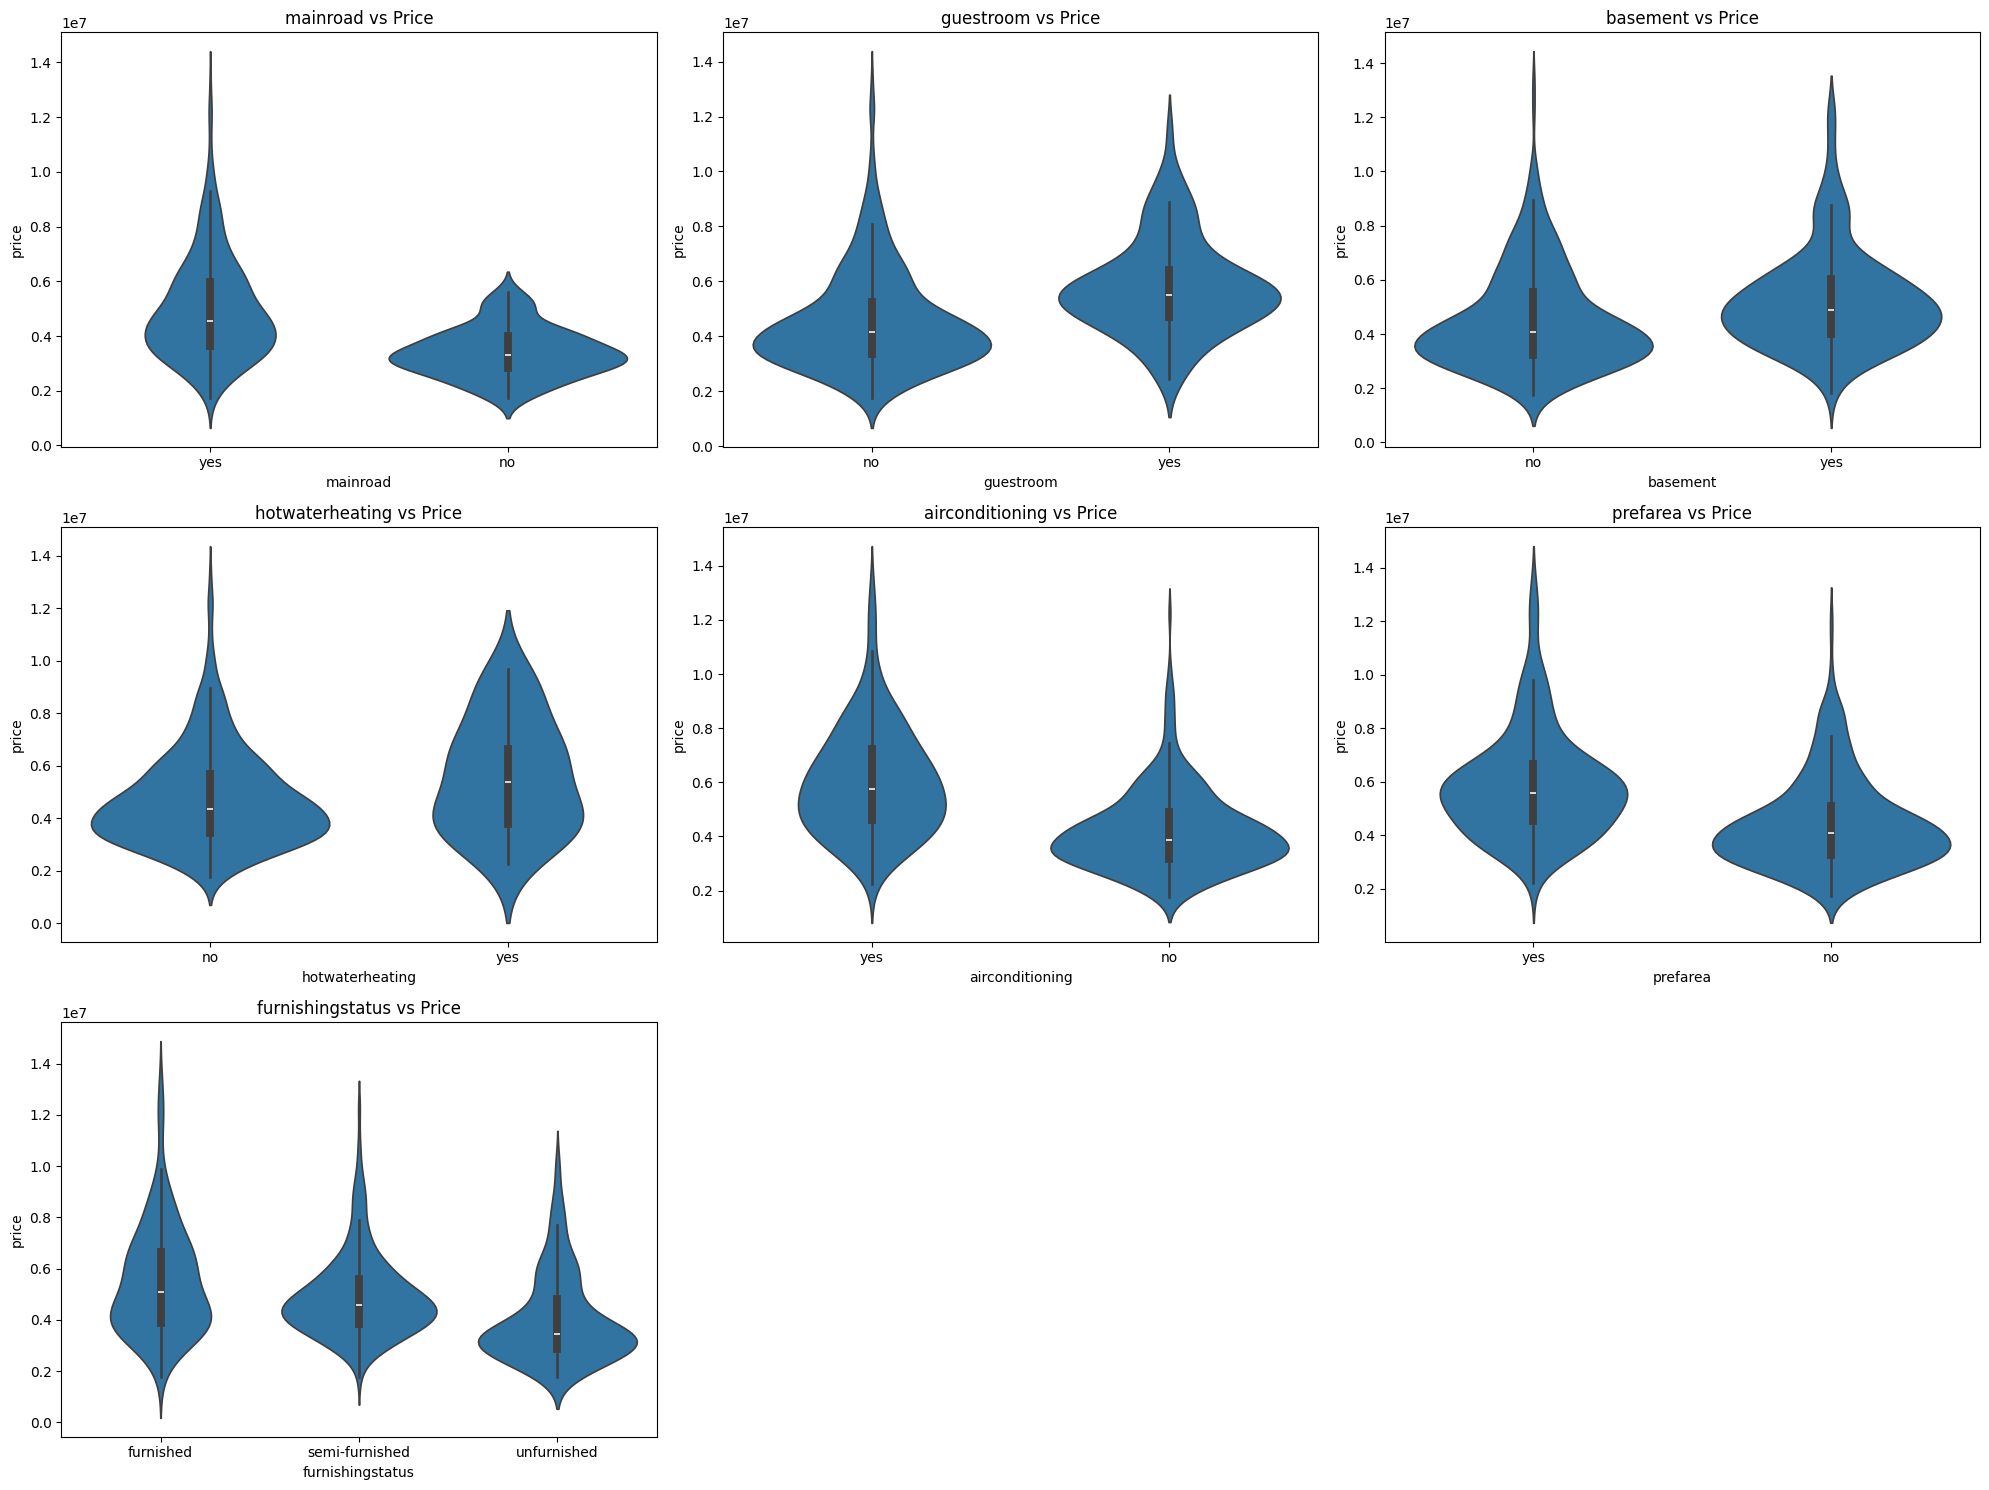

In [53]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(categorical_columns):
    plt.subplot(3, 3, i + 1)
    plt.title(f'{column} vs Price')
    sns.violinplot(x=df[column], y=df.price)

plt.tight_layout()
plt.show()

Preparing data for ML model

In [54]:
from sklearn.preprocessing import LabelEncoder


# converting categorical columns to numerical columns
encoder = LabelEncoder()
for i, column in enumerate(categorical_columns):
    df[column] = encoder.fit_transform(df[column])

df.drop('z_score', axis=1, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [55]:
df.shape

(545, 13)

In [56]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print("Train dataset shape:", df_train.shape)
print("Test dataset shape:", df_test.shape)

Train dataset shape: (436, 13)
Test dataset shape: (109, 13)


In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_train.columns)

df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,-0.109908,0.507246,1.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5
1,1.122398,0.724638,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.5
2,-0.276436,-0.166667,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.022481,0.181159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.709409,-0.195652,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5


In [91]:
X_train = df_train.drop('price', axis=1)
y_train = df_train['price']

X_test = df_test.drop('price', axis=1)
y_test = df_test['price']



In [78]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')


MSE: 0.4010888628384435
MAE: 0.46612570062851943
R² Score: 0.6494754192267792


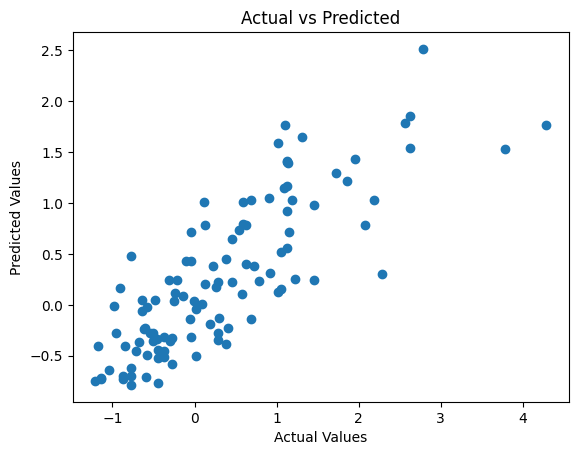

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()


Removing the low correlation features

In [92]:
# Check correlation with target variable
correlation_matrix = df_train.corr()
target_corr = correlation_matrix["price"].abs().sort_values(ascending=False)
print(target_corr)

# Remove features with low correlation (e.g., below 0.1)
low_corr_features = target_corr[target_corr < 0.3].index.tolist()
X_train = X_train.drop(columns=low_corr_features)
X_test = X_test.drop(columns=low_corr_features)


price               1.000000
area                0.533820
bathrooms           0.532511
airconditioning     0.470574
stories             0.405019
parking             0.378698
bedrooms            0.371415
furnishingstatus    0.307402
mainroad            0.303753
prefarea            0.299966
guestroom           0.264367
basement            0.206661
hotwaterheating     0.075273
Name: price, dtype: float64


In [93]:
low_corr_features

['prefarea', 'guestroom', 'basement', 'hotwaterheating']

In [94]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')

MSE: 0.45084511362950797
MAE: 0.501743910677812
R² Score: 0.6059918160522624
